In [5]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [7]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [8]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [9]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [10]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb),('XGB', xgb)], final_estimator=cb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [11]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            l...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd5f8835ee0>,
                  n_jobs=2, passthrough=True)

In [12]:
stacking_regressor1.score(X,y)

0.9913839002859545

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [13]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb), ('XGB', xgb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [14]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd5f8835ee0>,
                  passthrough=True)

In [15]:
stacking_regressor4.score(X,y)

0.9925827172894278

In [16]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [17]:
scores4

{'fit_time': array([6.7835629 , 6.94701791, 7.84672713, 7.11133313, 7.2266891 ]),
 'score_time': array([0.00567126, 0.0057869 , 0.00611877, 0.00574803, 0.00780582]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                                ('XGB',
                                 XGBRegressor(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                  

In [18]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [19]:
cat = evaluate_model(cb, X, y)

In [20]:
cat

,fit_time,score_time,test_score
0,6.566830,0.013390,0.926950
1,6.831789,0.007098,0.898789
2,6.705179,0.008999,0.936517
3,6.690784,0.014822,0.929022
4,7.099784,0.016258,0.950638
5,6.881361,0.015092,0.936688
6,6.554073,0.024227,0.942846
7,6.192137,0.015026,0.926769
8,6.039892,0.009188,0.945508
9,6.042837,0.008944,0.884738


In [21]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [22]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [23]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [24]:
df4

,fit_time,score_time,test_score
0,44.243526,0.027783,0.917095
1,44.425401,0.018426,0.889600
2,43.993514,0.018415,0.932646
3,45.331844,0.015826,0.921524
4,46.095721,0.008658,0.946054
5,46.883865,0.009571,0.925043
6,45.129170,0.017566,0.941839
7,45.366223,0.010342,0.924757
8,40.201945,0.017362,0.942435
9,42.883923,0.012300,0.883111


In [25]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [26]:
df4

,test_score_4
0,0.917095
1,0.889600
2,0.932646
3,0.921524
4,0.946054
5,0.925043
6,0.941839
7,0.924757
8,0.942435
9,0.883111


In [27]:
combo = pd.concat([cat, df4], axis=1)

In [28]:
combo

,cat_score,test_score_4
0,0.926950,0.917095
1,0.898789,0.889600
2,0.936517,0.932646
3,0.929022,0.921524
4,0.950638,0.946054
5,0.936688,0.925043
6,0.942846,0.941839
7,0.926769,0.924757
8,0.945508,0.942435
9,0.884738,0.883111


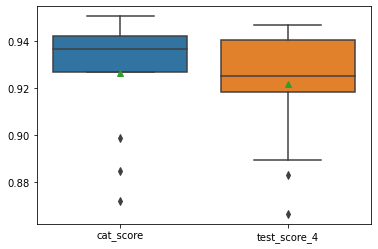

In [29]:
sns.boxplot(data=combo, showmeans=True);

In [30]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.926683,0.921598
std,0.023191,0.024132
min,0.872051,0.866411
25%,0.926860,0.918439
50%,0.936517,0.925043
75%,0.942064,0.940694
max,0.950638,0.946863
